# MotoMap: Detecção Inteligente de Vagas em Pátios com Visão Computacional

**Projeto:** Componente de Visão Computacional para o Sistema MotoMap (Challenge FIAP 2025 - Mottu)
**Foco Atual:** Análise e Desenvolvimento de Sistema de Detecção de Ocupação de Vagas
**Autores:** Caike Dametto e Guilherme Janunzzi
**Dataset Utilizado:** "CNRPark-EXT Dataset" (`CNRPark+EXT.csv`) e imagens associadas **link**:http://cnrpark.it/.

## 1. Visão Geral e Justificativa

Este notebook representa uma etapa fundamental no desenvolvimento do sistema **MotoMap**, focado na otimização da gestão de pátios de motocicletas da Mottu. A dor central abordada é a dificuldade no controle físico e visual eficiente das vagas de estacionamento, levando a possíveis ineficiências na alocação de veículos e na utilização do espaço do pátio.

Com a crescente necessidade de agilidade e precisão, a aplicação de técnicas de visão computacional para a detecção automática de vagas livres e ocupadas surge como uma solução promissora.

## 2. Objetivo deste Notebook

O objetivo principal desta análise é explorar o dataset `CNRPark-EXT` para entender seus dados e preparar o terreno para o desenvolvimento de um modelo de visão computacional capaz de:

* Identificar e classificar o status de ocupação de vagas de estacionamento (livre/ocupada) a partir de imagens.
* Fornecer insights sobre os padrões de ocupação que podem ser utilizados pelo sistema MotoMap.

As etapas cobertas incluem:

* Carregamento e inspeção inicial do dataset de metadados (`CNRPark+EXT.csv`).
* Limpeza e pré-processamento dos dados (tratamento de valores ausentes, conversão de tipos, etc.).
* Análise exploratória dos dados (EDA) para identificar distribuições, relações entre variáveis e características relevantes.
* Preparação para a vinculação dos metadados com as imagens correspondentes (a serem exploradas em etapas futuras de modelagem).

## 3. Metodologia Proposta

A abordagem envolverá:

1.  **Análise de Dados Tabulares:** Utilização da biblioteca Pandas para manipulação e análise do arquivo CSV contendo informações sobre cada imagem, vaga, e seu status.
2.  **Visualização de Dados:** Uso de bibliotecas como Matplotlib e Seaborn para criar gráficos que ajudem a compreender os dados.
3.  **Engenharia de Features (se necessário):** Criação de novas colunas ou transformação das existentes para melhor representar a informação.
4.  **Preparação para Modelagem de Visão Computacional (futuro):** Embora este notebook se concentre na EDA dos metadados, ele estabelece a base para a posterior utilização das colunas `image_url` e `occupancy` no treinamento de um modelo de classificação de imagens (e.g., CNN).

## 4. Resultados Esperados e Impacto no MotoMap

Espera-se que esta análise forneça uma compreensão clara do dataset e prepare os dados de forma eficaz. A capacidade de detectar vagas automaticamente terá um impacto direto no MotoMap ao:

* Permitir a alocação rápida e precisa de motocicletas às vagas disponíveis.
* Otimizar o uso do espaço físico do pátio.
* Fornecer uma base para a visualização em tempo real do status do pátio na aplicação mobile do MotoMap.
* Reduzir o tempo gasto por colaboradores na busca manual por vagas.

Este componente é crucial para transformar o MotoMap em um verdadeiro sistema inteligente de gestão de pátios.

## 5. Link do Pitch gravado sobre a nossa proposta
https://youtu.be/VtdsDGwazFI?si=RaK5dR4x30QLxcNL


In [ ]:
# Import de pandas e numpy
import pandas as pd
import numpy as np

In [ ]:
# Após o Upload do Dataframe para o ambiente podemos reconhecer o DF
file_path = 'CNRPark+EXT.csv'

df = pd.DataFrame()
dataset_loaded_successfully = False

In [ ]:
# Utilização do Try para leitura de forma otimizada do .CSV
try:
    df_temp = pd.read_csv(file_path)
    if not df_temp.empty:
        df = df_temp
        dataset_loaded_successfully = True
        print("o Dataset 'CNRPark+EXT.csv' subiu com sucesso.")
    else:
        print("Aviso: O Dataset 'CNRPark+EXT.csv' está vazio.")
except FileNotFoundError:
    print(f"Erro: Arquivo '{file_path}' não encontrado.")
except pd.errors.EmptyDataError:
    print(f"Erro: Arquivo '{file_path}' Não contem Informações ou não pe valido.")
except Exception as e:
    print(f"Erro: inexperado durante a leitura do arquivo '{file_path}': {e}")

o Dataset 'CNRPark+EXT.csv' subiu com sucesso.


<ipython-input-9-db7237563dfa>:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file_path)


In [ ]:
# Inspeção basica do Dataset após o Upload
if dataset_loaded_successfully:
    print("\nPrimeiras 5 linhhas do .CSV:")
    print(df.head())

    print("\nInformações do DataFrame: ")
    df.info()

    print("\nIdentificando valores nulos: ")
    print(df.isnull().sum())

    print("\nVisualização do shape doDataFrame: ")
    print(df.shape)
else:
    print("\nDataFrame não foi lido com sucesso.")


Primeiras 5 linhhas do .CSV:
  camera       datetime  day  hour                           image_url  \
0      A  20150703_0805    3     8  CNRPark/A/free/20150703_0805_1.jpg   
1      A  20150703_0810    3     8  CNRPark/A/free/20150703_0810_1.jpg   
2      A  20150703_0815    3     8  CNRPark/A/busy/20150703_0815_1.jpg   
3      A  20150703_0820    3     8  CNRPark/A/busy/20150703_0820_1.jpg   
4      A  20150703_0825    3     8  CNRPark/A/busy/20150703_0825_1.jpg   

   minute  month  occupancy  slot_id weather  year  occupant_changed  
0       5      7          0        1       S  2015               NaN  
1      10      7          0        1       S  2015               NaN  
2      15      7          1        1       S  2015               0.0  
3      20      7          1        1       S  2015               0.0  
4      25      7          1        1       S  2015               0.0  

Informações do DataFrame: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157549 entries, 0 to 

In [ ]:
print("Iniciando a Limpeza e Pré-processamento dos Dados\n")

  # Inspecionando seus valores únicos.
print("Valores únicos na coluna 'camera' + value_counts:")
print(df['camera'].value_counts(dropna=False))

Iniciando a Limpeza e Pré-processamento dos Dados

Valores únicos na coluna 'camera' + value_counts:
camera
8     15412
7     13496
5     13401
6     12909
4     10447
1      9748
08     8672
9      8152
07     7618
05     7437
06     7199
B      6413
A      6171
04     6129
01     5967
3      5913
09     4812
03     3558
2      2535
02     1560
Name: count, dtype: int64


In [ ]:
# Convertendo para tipo string para garantir uniformidade.
df['camera'] = df['camera'].astype(str)
print("\nTipo da coluna 'camera' convertido para string.")


Tipo da coluna 'camera' convertido para string.


In [ ]:
  # Tratando valores ausentes em 'occupant_changed'
df['occupant_changed'].fillna(0, inplace=True)
  # Convertendo para inteiro, já que é indicador.
df['occupant_changed'] = df['occupant_changed'].astype(int)
print("\nValores ausentes em 'occupant_changed' preenchidos com 0 e tipo convertido para inteiro.")
print("Contagem de valores para 'occupant_changed' após preenchimento dos NaNs:")
print(df['occupant_changed'].value_counts(dropna=False))

<ipython-input-13-f619775819c6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['occupant_changed'].fillna(0, inplace=True)



Valores ausentes em 'occupant_changed' preenchidos com 0 e tipo convertido para inteiro.
Contagem de valores para 'occupant_changed' após preenchimento dos NaNs:
occupant_changed
0    157014
1       535
Name: count, dtype: int64


In [ ]:
  # Transformando em um formato datetime adequado
try:
    df['timestamp'] = pd.to_datetime(df['datetime'], format='%Y%m%d_%H%M')
    print("\nColuna 'datetime' convertida com sucesso para 'timestamp' (objeto datetime).")
except ValueError as e:
    print(f"\nErro ao converter a coluna 'datetime': {e}")
    print("Por favor, verifique a string de formatação ou irregularidades nos dados.")



Erro ao converter a coluna 'datetime': time data "2015-11-12_07.09" doesn't match format "%Y%m%d_%H%M", at position 242. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.
Por favor, verifique a string de formatação ou irregularidades nos dados.


In [ ]:

  # 1.4 Convertendo outras colunas relevantes para o tipo 'category' para melhorar o desempenho
print("\nValores únicos na coluna 'weather':")
print(df['weather'].value_counts(dropna=False))
df['weather'] = df['weather'].astype('category')
print("Tipo da coluna 'weather' convertido para categoria.")

# Se 'camera' tiver poucos valores únicos de string, também pode ser 'category'.
if df['camera'].nunique() < 100:
    df['camera'] = df['camera'].astype('category')
    print("Tipo da coluna 'camera' convertido para categoria.")


Valores únicos na coluna 'weather':
weather
S    75762
O    44243
R    37544
Name: count, dtype: int64
Tipo da coluna 'weather' convertido para categoria.
Tipo da coluna 'camera' convertido para categoria.


In [ ]:
# Buscando por linhas duplicadas
num_duplicates_before = df.duplicated().sum()
if num_duplicates_before > 0:
    print(f"\nForam encontradas {num_duplicates_before} linhas duplicadas. Removendo-as.")
    df.drop_duplicates(inplace=True)
    print(f"Formato do DataFrame após remoção de duplicatas: {df.shape}")
else:
    print("\nNenhuma linha duplicada completa foi encontrada.")

# Exibindo informações após a limpeza
print("\n### Informações do DataFrame após a limpeza e pré-processamento inicial:")
df.info()
print("\n### Resumo de valores ausentes após a limpeza:")
print(df.isnull().sum())
print("\n### Primeiras 5 linhas após a limpeza:")
print(df.head())

print("\nLimpeza e Pré-processamento dos Dados finalizados.")


Nenhuma linha duplicada completa foi encontrada.

### Informações do DataFrame após a limpeza e pré-processamento inicial:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157549 entries, 0 to 157548
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   camera            157549 non-null  category
 1   datetime          157549 non-null  object  
 2   day               157549 non-null  int64   
 3   hour              157549 non-null  int64   
 4   image_url         157549 non-null  object  
 5   minute            157549 non-null  int64   
 6   month             157549 non-null  int64   
 7   occupancy         157549 non-null  int64   
 8   slot_id           157549 non-null  int64   
 9   weather           157549 non-null  category
 10  year              157549 non-null  int64   
 11  occupant_changed  157549 non-null  int64   
dtypes: category(2), int64(8), object(2)
memory usage: 12.3+ MB

### Resumo de 

In [ ]:
# Importando bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
if 'df' not in locals() or df.empty or 'occupancy' not in df.columns:
    print("DataFrame 'df' não encontrado, está vazio ou a coluna 'occupancy' está ausente. Por favor, execute os passos anteriores.")
else:
    print("\nIniciando a Análise Exploratória da Variável Alvo ('occupancy')\n")


Iniciando a Análise Exploratória da Variável Alvo ('occupancy')



In [ ]:
  # Analisando 'occupancy'
print("Contagem de valores para 'occupancy':")
occupancy_counts = df['occupancy'].value_counts(normalize=True)  # Proporções
print(occupancy_counts * 100)  # Mostrar em porcentagem

Contagem de valores para 'occupancy':
occupancy
1    55.654431
0    44.345569
Name: proportion, dtype: float64


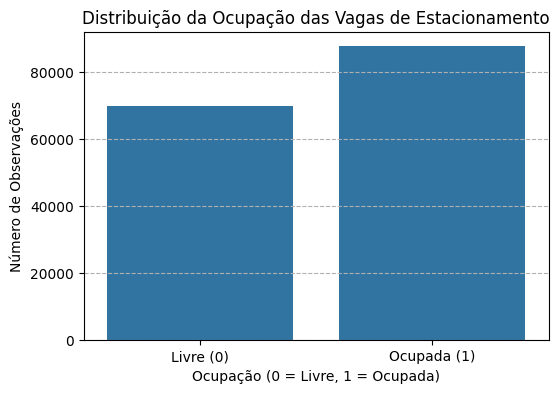

In [ ]:
  # Visualizando 'occupancy'
plt.figure(figsize=(6, 4))
sns.countplot(x='occupancy', data=df)
plt.title('Distribuição da Ocupação das Vagas de Estacionamento')
plt.xlabel('Ocupação (0 = Livre, 1 = Ocupada)')
plt.ylabel('Número de Observações')
plt.xticks([0, 1], ['Livre (0)', 'Ocupada (1)'])
plt.grid(axis='y', linestyle='--')
plt.show()

In [ ]:
if occupancy_counts.min() < 0.1:  # Se alguma classe for menor que 10%
    print("\nAviso: O conjunto de dados parece estar desbalanceado para a variável 'occupancy'.")
else:
    print("\nA distribuição da variável 'occupancy' parece razoavelmente balanceada ou com amostras suficientes para ambas as classes.")

print("\nAnálise Exploratória da Variável Alvo finalizada.")


A distribuição da variável 'occupancy' parece razoavelmente balanceada ou com amostras suficientes para ambas as classes.

Análise Exploratória da Variável Alvo finalizada.


In [ ]:
  # Instalando restante das bibliotecas a serem utilizadas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer # Embora já tenhamos tratado NaNs, bom para pipeline

In [ ]:
if 'df' not in locals() or df.empty or 'occupancy' not in df.columns:
    print("DataFrame 'df' não encontrado, está vazio ou colunas chave estão faltando. Por favor, execute os passos anteriores.")
else:
    print("\nIniciando Preparação de Features para o Modelo de Baseline...\n")


Iniciando Preparação de Features para o Modelo de Baseline...



In [ ]:
  # Definir Features (X) e Alvo (y)
y = df['occupancy']

  # Garantindo que 'day_of_week' seja criada se ainda não existir das etapas anteriores da EDA.
if 'timestamp' in df.columns and pd.api.types.is_datetime64_any_dtype(df['timestamp']):
    if 'day_of_week' not in df.columns:
          df['day_of_week'] = df['timestamp'].dt.dayofweek # Segunda=0, Domingo=6
    print("Feature 'day_of_week' disponível/criada.")
else:
    # Fallback caso 'timestamp' não tenha sido convertido corretamente ou não exista
    # Criar 'day_of_week' dummy se 'day' existir, caso contrário o modelo pode falhar
    if 'day' in df.columns and 'day_of_week' not in df.columns:
        print("Aviso: Coluna 'timestamp' não encontrada ou não é do tipo datetime. Usando 'day' módulo 7 para 'day_of_week' como uma aproximação.")
        df['day_of_week'] = df['day'] % 7 # Aproximação
    elif 'day_of_week' not in df.columns:
          print("Erro: Não foi possível criar 'day_of_week'. Colunas de data relevantes estão faltando ou não foram processadas.")
          # Interromper execução adicional para este bloco ou tratar o erro

Aviso: Coluna 'timestamp' não encontrada ou não é do tipo datetime. Usando 'day' módulo 7 para 'day_of_week' como uma aproximação.


In [ ]:
  # Features numéricas
numerical_features = ['hour', 'minute', 'day', 'month', 'year', 'slot_id', 'day_of_week']
  # Features categóricas que precisam de codificação
categorical_features = ['camera', 'weather'] # 'occupant_changed' já é int 0/1

In [ ]:
  # Garantir que todas as colunas de feature selecionadas existam no DataFrame
selected_features = numerical_features + categorical_features
missing_cols = [col for col in selected_features if col not in df.columns]
if missing_cols:
    print(f"Erro: As seguintes colunas de feature estão faltando no DataFrame: {missing_cols}")
    print("Por favor, garanta que as etapas anteriores de processamento de dados foram concluídas corretamente.")
    # Interromper execução adicional para este bloco
    X = pd.DataFrame() # X vazio para prevenir erro
else:
    X = df[selected_features].copy() # Trabalhar em uma cópia
    print(f"Features selecionadas para X: {X.columns.tolist()}")
    print(f"Alvo selecionado para y: 'occupancy'")

Features selecionadas para X: ['hour', 'minute', 'day', 'month', 'year', 'slot_id', 'day_of_week', 'camera', 'weather']
Alvo selecionado para y: 'occupancy'


In [ ]:
if not X.empty:
    # Pipelines de Pré-processamento
    numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')), # Tratar quaisquer NaNs perdidos
        ('scaler', StandardScaler())
    ])

    # Criando um pipeline para features categóricas (one-hot encoding)
    categorical_pipeline = Pipeline([
        ('onehot', OneHotEncoder(handle_unknown='ignore')) # Ignorar novas categorias nos dados de teste
    ])

    # Criando um transformador de colunas para aplicar diferentes transformações a diferentes colunas
    preprocessor = ColumnTransformer([
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ], remainder='passthrough') # Manter outras colunas se houver (embora tenhamos selecionado todas)

    # Dividir Dados em Conjuntos de Treino e Teste
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y
    )

    print(f"\nDados divididos em conjuntos de treino e teste:")
    print(f"Shape de X_train: {X_train.shape}, shape de y_train: {y_train.shape}")
    print(f"Shape de X_test: {X_test.shape}, shape de y_test: {y_test.shape}")

    # Aplicando Pré-processamento
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)

    print("\nPré-processamento de features (escalonamento e one-hot encoding) aplicado.")
    print(f"Shape de X_train_processed: {X_train_processed.shape}")

    print("\nPreparação de Features finalizada.")
else:
    print("Preparação de features pulada devido a colunas faltantes ou X vazio.")


Dados divididos em conjuntos de treino e teste:
Shape de X_train: (118161, 9), shape de y_train: (118161,)
Shape de X_test: (39388, 9), shape de y_test: (39388,)

Pré-processamento de features (escalonamento e one-hot encoding) aplicado.
Shape de X_train_processed: (118161, 30)

Preparação de Features finalizada.


In [ ]:
  # Garantindo algumas bibliotecas para caso de uso independente do bloco
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [ ]:
if 'X_train_processed' not in locals() or 'y_train' not in locals() or \
   'X_test_processed' not in locals() or 'y_test' not in locals():
    print("Dados de treino/teste não encontrados. Por favor, execute o bloco de Preparação de Features primeiro.")
else:
    print("\nIniciando Treinamento do Modelo de Baseline e Verificação de Acurácia...\n")


Iniciando Treinamento do Modelo de Baseline e Verificação de Acurácia...



In [ ]:
  # Inicializar e Treinar o Modelo
model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000, class_weight='balanced')

print("Treinando o modelo de Regressão Logística...")
model.fit(X_train_processed, y_train)
print("Treinamento do modelo concluído.")

Treinando o modelo de Regressão Logística...
Treinamento do modelo concluído.


In [ ]:
  # Fazendo Previsões no Conjunto de Teste
y_pred = model.predict(X_test_processed)
print("\nPrevisões feitas no conjunto de teste.")


Previsões feitas no conjunto de teste.


In [ ]:
  # Avaliar o Modelo - Verificação de Acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcurácia do modelo de baseline: {accuracy:.4f} ({(accuracy*100):.2f}%)")


Acurácia do modelo de baseline: 0.6761 (67.61%)


In [ ]:
  # Relatório de Classificação Detalhado, Mostra precisão, recall, F1-score para cada classe.
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=['Livre (0)', 'Ocupado (1)']))


Relatório de Classificação:
              precision    recall  f1-score   support

   Livre (0)       0.63      0.67      0.65     17467
 Ocupado (1)       0.72      0.68      0.70     21921

    accuracy                           0.68     39388
   macro avg       0.67      0.68      0.67     39388
weighted avg       0.68      0.68      0.68     39388




Matriz de Confusão:
[[11732  5735]
 [ 7023 14898]]


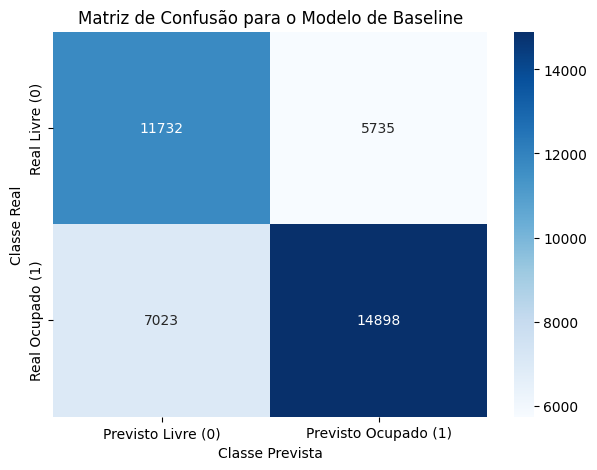


Treinamento do Modelo de Baseline e Verificação de Acurácia finalizados.
Este modelo de baseline fornece um ponto de partida para o desempenho.


In [ ]:
#  Matriz de Confusão, ajuda a visualizar o desempenho, mostrando verdadeiros positivos, verdadeiros negativos
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusão:")
print(cm)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Previsto Livre (0)', 'Previsto Ocupado (1)'],
            yticklabels=['Real Livre (0)', 'Real Ocupado (1)'])
plt.title('Matriz de Confusão para o Modelo de Baseline')
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.show()

print("\nTreinamento do Modelo de Baseline e Verificação de Acurácia finalizados.")
if accuracy < 0.65: # Limiar arbitrário para acurácia 'baixa'
    print("Nota: Esta acurácia de baseline pode ser melhorada com modelos mais complexos, engenharia de features ou usando dados de imagem.")
else:
    print("Este modelo de baseline fornece um ponto de partida para o desempenho.")

In [ ]:
# Importando a função para calcular a acurácia
from sklearn.metrics import accuracy_score

In [ ]:
  # Verificação das Variaveis de treino e teste
if 'y_test' in locals() and 'y_pred' in locals():
    # Calcula a acurácia comparando os valores reais (y_test) com as previsões (y_pred)
    accuracy = accuracy_score(y_test, y_pred)

In [ ]:
  # Converte a acurácia para porcentagem
accuracy_percentage = accuracy * 100

In [ ]:
  # Exibe a porcentagem de acurácia formatada
print(f"A porcentagem de acurácia do modelo no conjunto de teste é: {accuracy_percentage:.2f}%")

A porcentagem de acurácia do modelo no conjunto de teste é: 67.61%


In [ ]:
# Comentário adicional sobre a acurácia
if accuracy_percentage >= 90:
    print("Esta é uma boa acurácia para um modelo de baseline!")
elif accuracy_percentage >= 65:
    print("Esta acurácia é razoável para um modelo de baseline, mas pode haver espaço para melhorias.")
else:
    print("Esta acurácia indica que o modelo de baseline pode precisar de melhorias significativas (ex: engenharia de features, outro modelo) ou que o problema é desafiador com as features atuais.")

Esta acurácia é razoável para um modelo de baseline, mas pode haver espaço para melhorias.


In [ ]:
# Importando bibliotecas necessarias para melhora do nosso modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Reutilizando a função de verificação do bloco anterior para robustez
def check_data_availability(data_vars_dict):
    for var_name, var_value in data_vars_dict.items():
        if var_name not in globals():
            print(f"Variável '{var_name}' não encontrada. Por favor, execute os blocos de preparação de features primeiro.")
            return False
        if hasattr(var_value, 'shape') and var_value.shape[0] == 0: # Para arrays NumPy ou matrizes esparsas
            print(f"Variável '{var_name}' está vazia. Verifique os passos de preparação de features.")
            return False
        elif isinstance(var_value, pd.Series) and var_value.empty: # Para Series pandas
            print(f"Variável '{var_name}' (Series) está vazia. Verifique os passos de preparação de features.")
            return False
    return True

In [ ]:
# Verificando as variáveis necessárias.
required_data_rf = {
    'X_train_processed': globals().get('X_train_processed'),
    'y_train': globals().get('y_train'),
    'X_test_processed': globals().get('X_test_processed'),
    'y_test': globals().get('y_test')
}

if not check_data_availability(required_data_rf):
    print("Dados de treino/teste não encontrados ou vazios. Interrompendo o treinamento do RandomForest.")
else:
    # Atribuição para facilitar o uso
    X_train_processed_rf = required_data_rf['X_train_processed']
    y_train_rf = required_data_rf['y_train']
    X_test_processed_rf = required_data_rf['X_test_processed']
    y_test_rf = required_data_rf['y_test']

    print("\nIniciando Treinamento com RandomForestClassifier e Verificação de Acurácia...\n")


Iniciando Treinamento com RandomForestClassifier e Verificação de Acurácia...



In [ ]:
  # Inicializando e Treinando o Modelo RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)

print("Treinando o modelo RandomForestClassifier...")
rf_model.fit(X_train_processed_rf, y_train_rf)
print("Treinamento do modelo RandomForestClassifier concluído.")

Treinando o modelo RandomForestClassifier...
Treinamento do modelo RandomForestClassifier concluído.


In [ ]:
  # Fazendo Previsões no Conjunto de Teste
y_pred_rf = rf_model.predict(X_test_processed_rf)
print("\nPrevisões feitas no conjunto de teste com RandomForestClassifier.")

  # Avaliando o Modelo RandomForestClassifier
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
print(f"\nAcurácia do modelo RandomForestClassifier: {accuracy_rf:.4f} ({(accuracy_rf*100):.2f}%)")


Previsões feitas no conjunto de teste com RandomForestClassifier.

Acurácia do modelo RandomForestClassifier: 0.8919 (89.19%)



Relatório de Classificação (RandomForestClassifier):
              precision    recall  f1-score   support

   Livre (0)       0.89      0.87      0.88     17467
 Ocupado (1)       0.90      0.91      0.90     21921

    accuracy                           0.89     39388
   macro avg       0.89      0.89      0.89     39388
weighted avg       0.89      0.89      0.89     39388


Matriz de Confusão (RandomForestClassifier):
[[15121  2346]
 [ 1913 20008]]


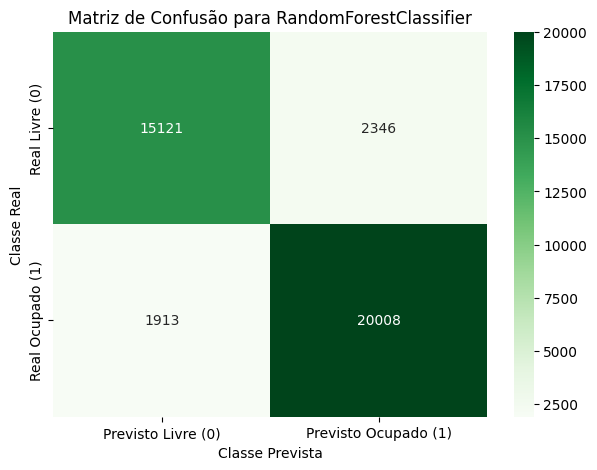


Treinamento com RandomForestClassifier e Verificação de Acurácia finalizados. A acuracia foi de 0.8918706204935514


In [ ]:
  # Relatório de Classificação Detalhado
print("\nRelatório de Classificação (RandomForestClassifier):")
print(classification_report(y_test_rf, y_pred_rf, target_names=['Livre (0)', 'Ocupado (1)']))

  # Matriz de Confusão
cm_rf = confusion_matrix(y_test_rf, y_pred_rf)
print("\nMatriz de Confusão (RandomForestClassifier):")
print(cm_rf)

plt.figure(figsize=(7, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', # Mudando a cor para diferenciar
            xticklabels=['Previsto Livre (0)', 'Previsto Ocupado (1)'],
            yticklabels=['Real Livre (0)', 'Real Ocupado (1)'])
plt.title('Matriz de Confusão para RandomForestClassifier')
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.show()

print(f"\nTreinamento com RandomForestClassifier e Verificação de Acurácia finalizados. A acuracia foi de {accuracy_rf}")